📂 Please upload your dataset CSV file (e.g., customer_churn.csv)...


Saving customer_churn_dataset-master.csv to customer_churn_dataset-master (1).csv

✅ Dataset Loaded Successfully!
Shape: (440833, 12)
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0      

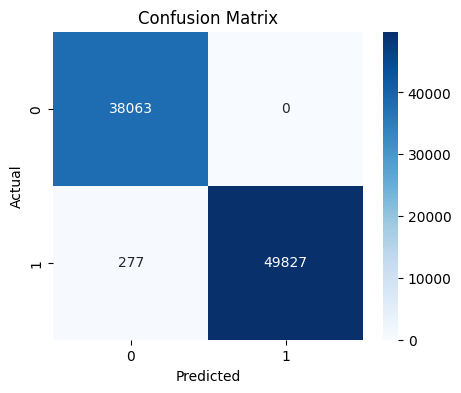

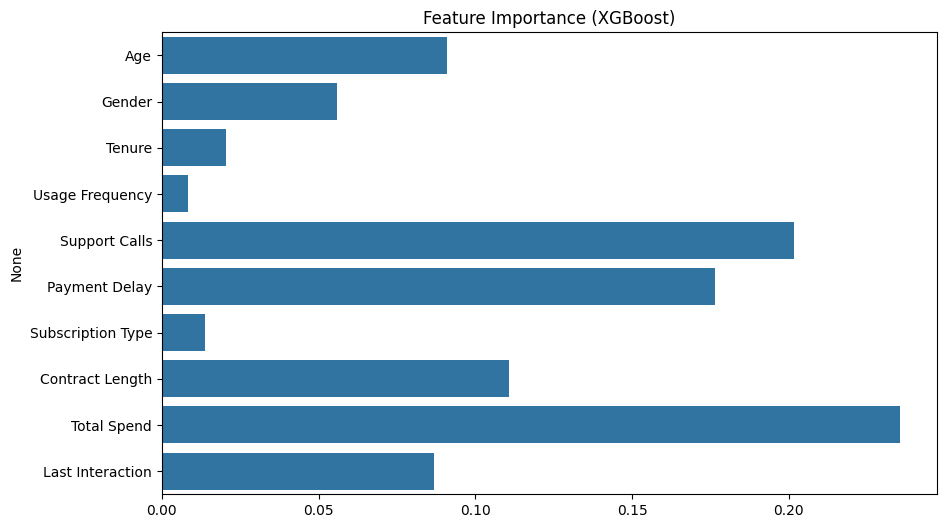

In [4]:
# ===============================================
# 📊 XGBoost Mini Project - Customer Churn Prediction (Final Version)
# ===============================================

# Step 1️⃣: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import files
import io

# Step 2️⃣: Upload CSV File
print("📂 Please upload your dataset CSV file (e.g., customer_churn.csv)...")
uploaded = files.upload()

# Step 3️⃣: Read the CSV
df = pd.read_csv(io.BytesIO(list(uploaded.values())[0]))
print("\n✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())

# Step 4️⃣: Drop non-essential ID column (if exists)
if 'CustomerID' in df.columns:
    df = df.drop('CustomerID', axis=1)

# Step 5️⃣: Handle missing values
df = df.replace(" ", np.nan)
df = df.dropna()

# Step 6️⃣: Fix the target column (Churn)
# Convert text labels to numeric if needed
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0, 'Exited': 1, 'Stayed': 0})

# Drop any remaining rows with NaN in Churn
df = df.dropna(subset=['Churn'])

# Convert to int
df['Churn'] = df['Churn'].astype(int)

print("\nUnique values in Churn after cleaning:", df['Churn'].unique())

# Step 7️⃣: Encode Categorical Variables
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category').cat.codes  # faster encoding

# Step 8️⃣: Split Features & Target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 9️⃣: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 🔟: Build XGBoost Model (optimized for speed)
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist'  # change to 'gpu_hist' if Colab GPU enabled
)

# Step 1️⃣1️⃣: Train Model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Step 1️⃣2️⃣: Evaluate Model
y_pred = model.predict(X_test)
print("\n🔹 Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Step 1️⃣3️⃣: Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 1️⃣4️⃣: Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance (XGBoost)")
plt.show()
